# Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd

In [26]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [27]:
def rating_assignment(row):
    if row['rating'] <= 2:
        return 'low rating'
    elif row['rating'] <= 4:
        return 'medium rating'
    else:
        return 'high rating'

In [29]:
ratings['class'] = ratings.apply(rating_assignment, axis=1)
ratings.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,medium rating
1,1,3,4.0,964981247,medium rating
2,1,6,4.0,964982224,medium rating
3,1,47,5.0,964983815,high rating
4,1,50,5.0,964982931,high rating


# Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

In [2]:
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [3]:
keywords = pd.read_csv('Desktop/keywords.csv')
keywords.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [9]:
"""
def region_detection(row):
    for j in list(geo_data.keys()):
        for i in range(0, len(geo_data[j])):
            if geo_data[j][i] in row['keyword']:
                return j
            else:
                continue
"""

"\ndef region_detection(row):\n    for j in list(geo_data.keys()):\n        for i in range(0, len(geo_data[j])):\n            if geo_data[j][i] in row['keyword']:\n                return j\n            else:\n                continue\n"

In [18]:
def region_detection(row):
    for region, cities in geo_data.items():
        for city in cities:
            if city in row['keyword']:
                return region
    
    return 'undefined'

In [19]:
keywords['region'] = keywords.apply(region_detection, axis=1)
keywords.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [20]:
keywords[keywords['keyword'] == 'москва погода']

,keyword,shows,region
8132,москва погода,151701,Центр


In [21]:
keywords[keywords['keyword'] == 'псков']

,keyword,shows,region
11222,псков,24885,Северо-Запад


# Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
        1. для каждой строки пройдите по всем годам списка years
        2. если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
        3. если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [23]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
joined = ratings.merge(movies, on='movieId', how='left')
joined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [26]:
import datetime
year = datetime.datetime.today().year
years = list(range(year - 9, year - 70, -1))

In [30]:
def production_year(row):
    for i in years:
        if str(i) in row['title']:
            return int(i)
    
    return 1900

In [31]:
joined['year'] = joined.apply(production_year, axis=1)
joined.head()

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995


In [32]:
joined.tail()

,userId,movieId,rating,timestamp,title,genres,year
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,1900
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,1900
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,1900
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,1900
100835,610,170875,3.0,1493846415,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,1900


In [33]:
results = joined.groupby('year').agg({'rating': 'mean'})
results = results.reset_index()
results.head()

,year,rating
0,1900,3.538228
1,1950,3.813665
2,1951,3.804945
3,1952,3.953125
4,1953,3.647059


In [34]:
import seaborn as sns

Похоже, что действительно раньше снимали настоящее кино, не то что сейчас:


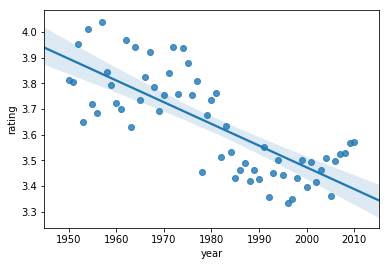

In [39]:
sns.regplot(x='year',y='rating',data=results[results['year'] != 1900], fit_reg=True) 
print('Похоже, что действительно раньше снимали настоящее кино, не то что сейчас:')